In [1]:
# Load libraries
import pandas as pd
import numpy as np
import warnings 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
warnings.filterwarnings('ignore')
dataset =pd.read_csv('clevedata.csv')

In [3]:
#heart_data.head() # print first 5 rows of the dataset
#heart_data.tail() # print last 5 rows of the dataset
#heart_data.shape # number of rows and columns in the datasetg
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
# getting some info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
# checking for missing values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
# statistical measures about the data
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [7]:
# checking the distribution of Target Variable
dataset['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [8]:
missing_values=["?"]
heart=pd.read_csv('clevedata.csv',na_values=missing_values)

In [9]:
heart=heart.dropna()

In [10]:
#X =dataset.iloc[:,:-1]
#Y =dataset.iloc[:,13]
X = heart.drop(columns='num', axis=1)
Y = heart['num']
validation_size = 0.30
seed = 7

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57    0   4       140   241    0        0      123      1      0.2   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [12]:
print(Y)

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: num, Length: 297, dtype: int64


In [13]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=seed)
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=70)))

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (207, 13) (90, 13)


# LogisticRegression

In [15]:
print("Logistic regression based confusion matrix")
lg=LogisticRegression(solver='liblinear', multi_class='ovr')
lg.fit(X_train, Y_train)
predictions = lg.predict(X_test)
LRcm=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


Logistic regression based confusion matrix
[[43  0  0  2  1]
 [10  3  3  3  0]
 [ 3  3  1  2  0]
 [ 0  2  6  2  1]
 [ 0  0  2  3  0]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        46
           1       0.38      0.16      0.22        19
           2       0.08      0.11      0.10         9
           3       0.17      0.18      0.17        11
           4       0.00      0.00      0.00         5

    accuracy                           0.54        90
   macro avg       0.28      0.28      0.27        90
weighted avg       0.50      0.54      0.51        90



In [16]:
# Calculate diagonal matrix
diagonal_matrix = np.diag(LRcm)
sum_of_Diagonal_matrix=np.sum(diagonal_matrix)
print("Diagonal matrix:", diagonal_matrix)
print("Sum of Diagonal matrix",sum_of_Diagonal_matrix)

Diagonal matrix: [43  3  1  2  0]
Sum of Diagonal matrix 49


In [17]:
# Calculate elements of confusion matrix without diagonal
conf_matrix_without_diagonal = LRcm - np.diag(diagonal_matrix)
print("Confusion matrix without diagonal:\n", conf_matrix_without_diagonal)
print("Sum of Confusion matrix without diagonal",np.sum(conf_matrix_without_diagonal))

Confusion matrix without diagonal:
 [[ 0  0  0  2  1]
 [10  0  3  3  0]
 [ 3  3  0  2  0]
 [ 0  2  6  0  1]
 [ 0  0  2  3  0]]
Sum of Confusion matrix without diagonal 41


In [18]:
# Calculate elements of confusion matrix
sum_confusion_matrix=np.sum(LRcm)
print("\nThe sum of the matrix is: ",sum_confusion_matrix )


The sum of the matrix is:  90


In [19]:
class_accuracy_=sum_of_Diagonal_matrix/sum_confusion_matrix*100
print("Accuracy for Logistic Regression",class_accuracy_)

Accuracy for Logistic Regression 54.44444444444444


In [20]:
# Calculate accuracy for each class
#class_accuracy = np.divide(diagonal_matrix, np.sum(cm, axis=1))
#print("Accuracy for each class:", class_accuracy)
#class_accuracy = diagonal_matrix /sum_confusion_matrix
#print("Accuracy for each class:", class_accuracy)
# Calculate accuracy for each class
class_accuracy = diagonal_matrix / np.sum(LRcm, axis=1)
print("Accuracy for each class:", class_accuracy)

Accuracy for each class: [0.93478261 0.15789474 0.11111111 0.18181818 0.        ]


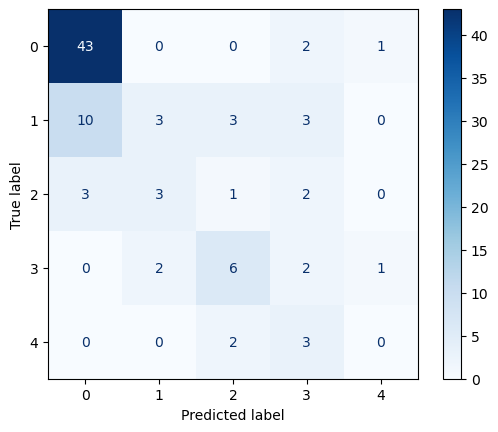

In [21]:
# Generate a multi-class confusion matrix
plot_confusion_matrix(lg, X_test, Y_test, cmap=plt.cm.Blues)

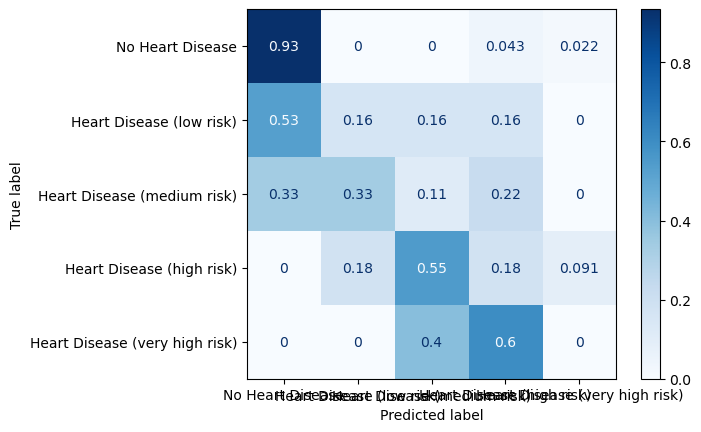

In [22]:
# Generate a 5x5 multi-class confusion matrix
classes = ['No Heart Disease', 'Heart Disease (low risk)', 'Heart Disease (medium risk)', 'Heart Disease (high risk)', 'Heart Disease (very high risk)']
plot_confusion_matrix(lg, X_test, Y_test, cmap=plt.cm.Blues, normalize='true', display_labels=classes)

# RandomForestClassifier

In [23]:
print("Random Forest based confusion matrix")
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
RFcm=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


Random Forest based confusion matrix
[[42  2  1  1  0]
 [11  1  2  5  0]
 [ 2  2  4  1  0]
 [ 2  3  3  3  0]
 [ 1  0  2  2  0]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.81        46
           1       0.12      0.05      0.07        19
           2       0.33      0.44      0.38         9
           3       0.25      0.27      0.26        11
           4       0.00      0.00      0.00         5

    accuracy                           0.56        90
   macro avg       0.29      0.34      0.30        90
weighted avg       0.46      0.56      0.50        90



In [24]:
# Calculate diagonal matrix
diagonal_matrix = np.diag(RFcm)
sum_of_Diagonal_matrix=np.sum(diagonal_matrix)
print("Diagonal matrix:", diagonal_matrix)
print("Sum of Diagonal matrix",sum_of_Diagonal_matrix)

Diagonal matrix: [42  1  4  3  0]
Sum of Diagonal matrix 50


In [25]:
# Calculate elements of confusion matrix without diagonal
conf_matrix_without_diagonal = RFcm - np.diag(diagonal_matrix)
print("Confusion matrix without diagonal:\n", conf_matrix_without_diagonal)
print("Sum of Confusion matrix without diagonal",np.sum(conf_matrix_without_diagonal))


Confusion matrix without diagonal:
 [[ 0  2  1  1  0]
 [11  0  2  5  0]
 [ 2  2  0  1  0]
 [ 2  3  3  0  0]
 [ 1  0  2  2  0]]
Sum of Confusion matrix without diagonal 40


In [26]:
# Calculate elements of confusion matrix
sum_confusion_matrix=np.sum(RFcm)
print("\nThe sum of the matrix is: ",sum_confusion_matrix )


The sum of the matrix is:  90


In [27]:
class_accuracy_=sum_of_Diagonal_matrix/sum_confusion_matrix*100
print("Accuracy for Random Forest Classifier ",class_accuracy_)

Accuracy for Random Forest Classifier  55.55555555555556


In [28]:
# Calculate accuracy for each class
#class_accuracy = np.divide(diagonal_matrix, np.sum(RFcm, axis=1))
#print("Accuracy for each class:", class_accuracy)
# Calculate accuracy for each class
class_accuracy = diagonal_matrix / np.sum(RFcm, axis=1)
print("Accuracy for each class:", class_accuracy)


Accuracy for each class: [0.91304348 0.05263158 0.44444444 0.27272727 0.        ]


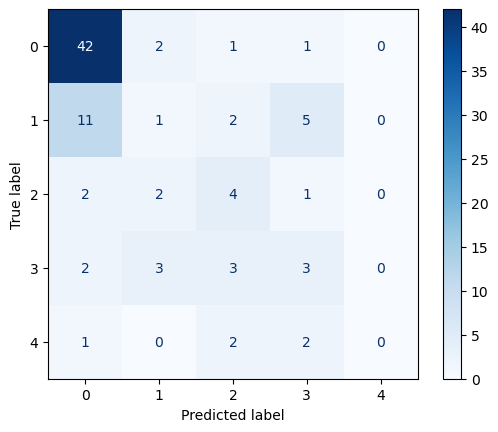

In [29]:
# Generate a multi-class confusion matrix
plot_confusion_matrix(rf, X_test, Y_test, cmap=plt.cm.Blues)

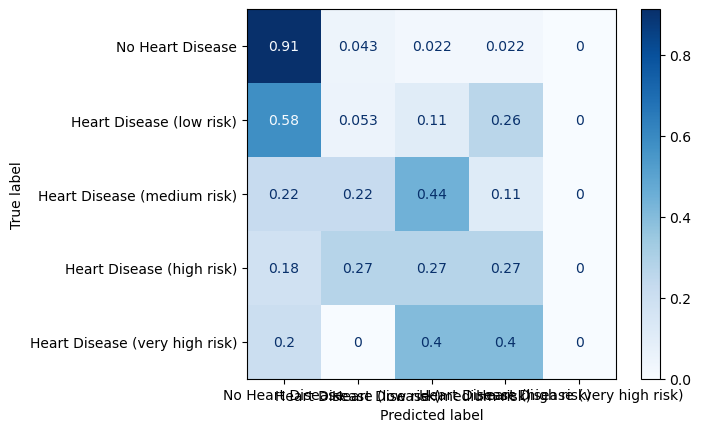

In [30]:
# Generate a 5x5 multi-class confusion matrix
classes = ['No Heart Disease', 'Heart Disease (low risk)', 'Heart Disease (medium risk)', 'Heart Disease (high risk)', 'Heart Disease (very high risk)']
plot_confusion_matrix(rf, X_test, Y_test, cmap=plt.cm.Blues, normalize='true', display_labels=classes)

# Support Vector Machine(SVM)

In [31]:
print("SVM based confusion matrix")
sv=SVC(gamma='auto')
sv.fit(X_train, Y_train)
predictions = sv.predict(X_test)
SVMcm=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


SVM based confusion matrix
[[46  0  0  0  0]
 [19  0  0  0  0]
 [ 9  0  0  0  0]
 [11  0  0  0  0]
 [ 5  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        46
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         5

    accuracy                           0.51        90
   macro avg       0.10      0.20      0.14        90
weighted avg       0.26      0.51      0.35        90



In [32]:
# Calculate diagonal matrix
diagonal_matrix = np.diag(SVMcm)
sum_of_Diagonal_matrix=np.sum(diagonal_matrix)
print("Diagonal matrix:", diagonal_matrix)
print("Sum of Diagonal matrix",sum_of_Diagonal_matrix)

Diagonal matrix: [46  0  0  0  0]
Sum of Diagonal matrix 46


In [33]:
# Calculate elements of confusion matrix without diagonal
conf_matrix_without_diagonal = SVMcm - np.diag(diagonal_matrix)
print("Confusion matrix without diagonal:\n", conf_matrix_without_diagonal)
print("Sum of Confusion matrix without diagonal",np.sum(conf_matrix_without_diagonal))


Confusion matrix without diagonal:
 [[ 0  0  0  0  0]
 [19  0  0  0  0]
 [ 9  0  0  0  0]
 [11  0  0  0  0]
 [ 5  0  0  0  0]]
Sum of Confusion matrix without diagonal 44


In [34]:
# Calculate elements of confusion matrix
sum_confusion_matrix=np.sum(SVMcm)
print("\nThe sum of the matrix is: ",sum_confusion_matrix )


The sum of the matrix is:  90


In [35]:
class_accuracy_=sum_of_Diagonal_matrix/sum_confusion_matrix*100
print("Accuracy for Support Vector Machine(SVM) ",class_accuracy_)


Accuracy for Support Vector Machine(SVM)  51.11111111111111


In [36]:
# Calculate accuracy for each class
#class_accuracy = np.divide(diagonal_matrix, np.sum(SVMcm, axis=1))
#print("Accuracy for each class:", class_accuracy)
# Calculate accuracy for each class
class_accuracy = diagonal_matrix / np.sum(SVMcm, axis=1)
print("Accuracy for each class:", class_accuracy)

Accuracy for each class: [1. 0. 0. 0. 0.]


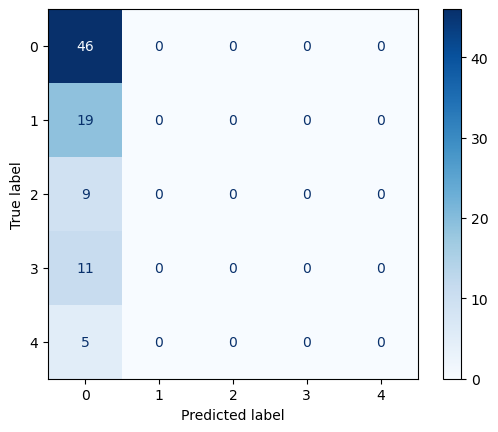

In [37]:
# Generate a multi-class confusion matrix
plot_confusion_matrix(sv, X_test, Y_test, cmap=plt.cm.Blues)

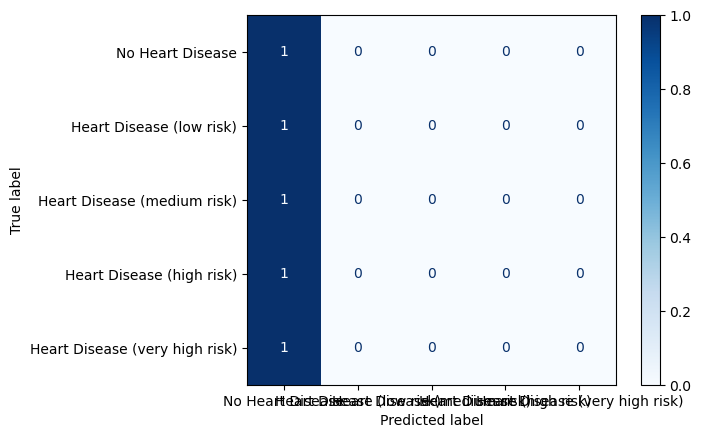

In [38]:
# Generate a 5x5 multi-class confusion matrix
classes = ['No Heart Disease', 'Heart Disease (low risk)', 'Heart Disease (medium risk)', 'Heart Disease (high risk)', 'Heart Disease (very high risk)']
plot_confusion_matrix(sv, X_test, Y_test, cmap=plt.cm.Blues, normalize='true', display_labels=classes)

# LinearDiscriminantAnalysis

In [39]:
print("LinearDiscriminant based confusion matrix")
ld=LinearDiscriminantAnalysis()
ld.fit(X_train, Y_train)
predictions = ld.predict(X_test)
LDcm=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


LinearDiscriminant based confusion matrix
[[42  1  0  2  1]
 [ 9  3  3  4  0]
 [ 2  3  1  2  1]
 [ 0  2  6  1  2]
 [ 0  0  2  3  0]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        46
           1       0.33      0.16      0.21        19
           2       0.08      0.11      0.10         9
           3       0.08      0.09      0.09        11
           4       0.00      0.00      0.00         5

    accuracy                           0.52        90
   macro avg       0.26      0.25      0.25        90
weighted avg       0.49      0.52      0.50        90



In [40]:
# Calculate diagonal matrix
diagonal_matrix = np.diag(LDcm)
sum_of_Diagonal_matrix=np.sum(diagonal_matrix)
print("Diagonal matrix:", diagonal_matrix)
print("Sum of Diagonal matrix",sum_of_Diagonal_matrix)

Diagonal matrix: [42  3  1  1  0]
Sum of Diagonal matrix 47


In [41]:
# Calculate elements of confusion matrix without diagonal
conf_matrix_without_diagonal = LDcm - np.diag(diagonal_matrix)
print("Confusion matrix without diagonal:\n", conf_matrix_without_diagonal)
print("Sum of Confusion matrix without diagonal",np.sum(conf_matrix_without_diagonal))

Confusion matrix without diagonal:
 [[0 1 0 2 1]
 [9 0 3 4 0]
 [2 3 0 2 1]
 [0 2 6 0 2]
 [0 0 2 3 0]]
Sum of Confusion matrix without diagonal 43


In [42]:
# Calculate elements of confusion matrix
sum_confusion_matrix=np.sum(LDcm)
print("\nThe sum of the matrix is: ",sum_confusion_matrix )


The sum of the matrix is:  90


In [43]:
class_accuracy_=sum_of_Diagonal_matrix/sum_confusion_matrix*100
print("Accuracy for Linear Discriminant Analysis ",class_accuracy_)


Accuracy for Linear Discriminant Analysis  52.22222222222223


In [44]:
# Calculate accuracy for each class
#class_accuracy = np.divide(diagonal_matrix, np.sum(LDcm, axis=1))
#print("Accuracy for each class:", class_accuracy)
# Calculate accuracy for each class
class_accuracy = diagonal_matrix / np.sum(LDcm, axis=1)
print("Accuracy for each class:", class_accuracy)

Accuracy for each class: [0.91304348 0.15789474 0.11111111 0.09090909 0.        ]


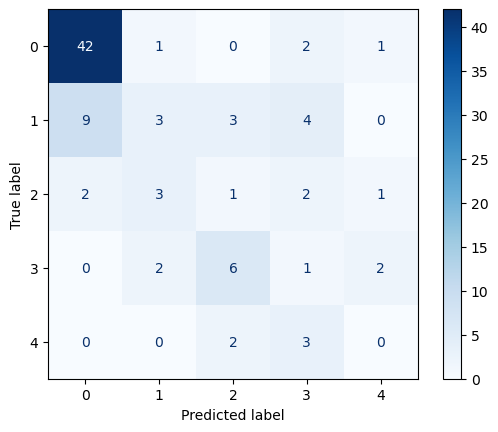

In [45]:
# Generate a multi-class confusion matrix
plot_confusion_matrix(ld, X_test, Y_test, cmap=plt.cm.Blues)

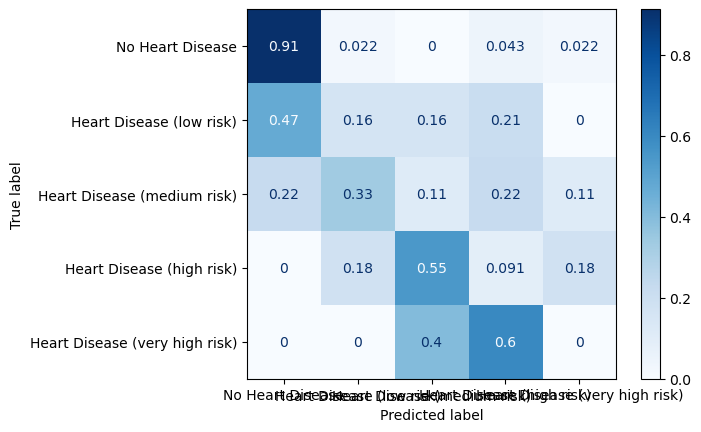

In [46]:
# Generate a 5x5 multi-class confusion matrix
classes = ['No Heart Disease', 'Heart Disease (low risk)', 'Heart Disease (medium risk)', 'Heart Disease (high risk)', 'Heart Disease (very high risk)']
plot_confusion_matrix(ld, X_test, Y_test, cmap=plt.cm.Blues, normalize='true', display_labels=classes)

# DecisionTreeClassifier

In [47]:
print("Decision tree based confusion matrix")
dtc=DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_test)
DTcm=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


Decision tree based confusion matrix
[[35  7  2  0  2]
 [ 8  3  3  5  0]
 [ 3  3  1  1  1]
 [ 2  1  3  2  3]
 [ 0  0  2  3  0]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        46
           1       0.21      0.16      0.18        19
           2       0.09      0.11      0.10         9
           3       0.18      0.18      0.18        11
           4       0.00      0.00      0.00         5

    accuracy                           0.46        90
   macro avg       0.24      0.24      0.24        90
weighted avg       0.45      0.46      0.45        90



In [48]:
# Calculate diagonal matrix
diagonal_matrix = np.diag(DTcm)
sum_of_Diagonal_matrix=np.sum(diagonal_matrix)
print("Diagonal matrix:", diagonal_matrix)
print("Sum of Diagonal matrix",sum_of_Diagonal_matrix)

Diagonal matrix: [35  3  1  2  0]
Sum of Diagonal matrix 41


In [49]:

# Calculate elements of confusion matrix without diagonal
conf_matrix_without_diagonal = DTcm - np.diag(diagonal_matrix)
print("Confusion matrix without diagonal:\n", conf_matrix_without_diagonal)
print("Sum of Confusion matrix without diagonal",np.sum(conf_matrix_without_diagonal))

Confusion matrix without diagonal:
 [[0 7 2 0 2]
 [8 0 3 5 0]
 [3 3 0 1 1]
 [2 1 3 0 3]
 [0 0 2 3 0]]
Sum of Confusion matrix without diagonal 49


In [50]:
# Calculate elements of confusion matrix
sum_confusion_matrix=np.sum(DTcm)
print("\nThe sum of the matrix is: ",sum_confusion_matrix )


The sum of the matrix is:  90


In [51]:
class_accuracy_=sum_of_Diagonal_matrix/sum_confusion_matrix*100
print("Accuracy for Decision Tree Classifier ",class_accuracy_)


Accuracy for Decision Tree Classifier  45.55555555555556


In [52]:
# Calculate accuracy for each class
#class_accuracy = np.divide(diagonal_matrix, np.sum(DTcm, axis=1))
#print("Accuracy for each class:", class_accuracy)
# Calculate accuracy for each class
class_accuracy = diagonal_matrix / np.sum(DTcm, axis=1)
print("Accuracy for each class:", class_accuracy)


Accuracy for each class: [0.76086957 0.15789474 0.11111111 0.18181818 0.        ]


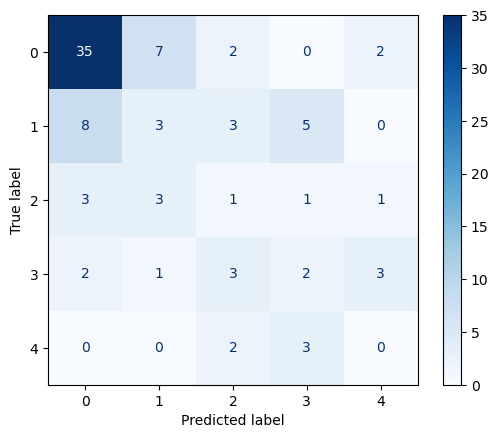

In [53]:
# Generate a multi-class confusion matrix
plot_confusion_matrix(dtc, X_test, Y_test, cmap=plt.cm.Blues)

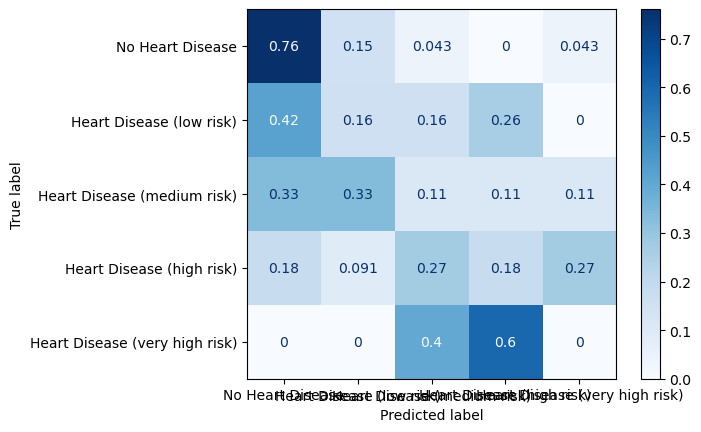

In [54]:
# Generate a 5x5 multi-class confusion matrix
classes = ['No Heart Disease', 'Heart Disease (low risk)', 'Heart Disease (medium risk)', 'Heart Disease (high risk)', 'Heart Disease (very high risk)']
plot_confusion_matrix(dtc, X_test, Y_test, cmap=plt.cm.Blues, normalize='true', display_labels=classes)

# Neural network 

In [55]:
print("Neural net based confusion matrix")
mlp = MLPClassifier(hidden_layer_sizes=(31,31),max_iter=100)
mlp.fit(X_train,Y_train)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(31, 31), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, 
       verbose=False, warm_start=False)# test_fraction=0.1,
predictions = mlp.predict(X_test)
NNcm=confusion_matrix(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


Neural net based confusion matrix
[[43  1  0  2  0]
 [16  0  1  2  0]
 [ 4  1  2  2  0]
 [ 8  1  1  1  0]
 [ 5  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.57      0.93      0.70        46
           1       0.00      0.00      0.00        19
           2       0.50      0.22      0.31         9
           3       0.14      0.09      0.11        11
           4       0.00      0.00      0.00         5

    accuracy                           0.51        90
   macro avg       0.24      0.25      0.22        90
weighted avg       0.36      0.51      0.40        90



In [56]:
# Calculate diagonal matrix
diagonal_matrix = np.diag(NNcm)
sum_of_Diagonal_matrix=np.sum(diagonal_matrix)
print("Diagonal matrix:", diagonal_matrix)
print("Sum of Diagonal matrix",sum_of_Diagonal_matrix)

Diagonal matrix: [43  0  2  1  0]
Sum of Diagonal matrix 46


In [57]:
# Calculate elements of confusion matrix without diagonal
conf_matrix_without_diagonal = NNcm - np.diag(diagonal_matrix)
print("Confusion matrix without diagonal:\n", conf_matrix_without_diagonal)
print("Sum of Confusion matrix without diagonal",np.sum(conf_matrix_without_diagonal))

Confusion matrix without diagonal:
 [[ 0  1  0  2  0]
 [16  0  1  2  0]
 [ 4  1  0  2  0]
 [ 8  1  1  0  0]
 [ 5  0  0  0  0]]
Sum of Confusion matrix without diagonal 44


In [58]:
# Calculate elements of confusion matrix
sum_confusion_matrix=np.sum(NNcm)
print("\nThe sum of the matrix is: ",sum_confusion_matrix )


The sum of the matrix is:  90


In [59]:
class_accuracy_=sum_of_Diagonal_matrix/sum_confusion_matrix*100
print("Accuracy for Neural network ",class_accuracy_)


Accuracy for Neural network  51.11111111111111


In [60]:
# Calculate accuracy for each class
#class_accuracy = np.divide(diagonal_matrix, np.sum(NNcm, axis=1))
#print("Accuracy for each class:", class_accuracy)
# Calculate accuracy for each class
class_accuracy = diagonal_matrix / np.sum(NNcm, axis=1)
print("Accuracy for each class:", class_accuracy)


Accuracy for each class: [0.93478261 0.         0.22222222 0.09090909 0.        ]


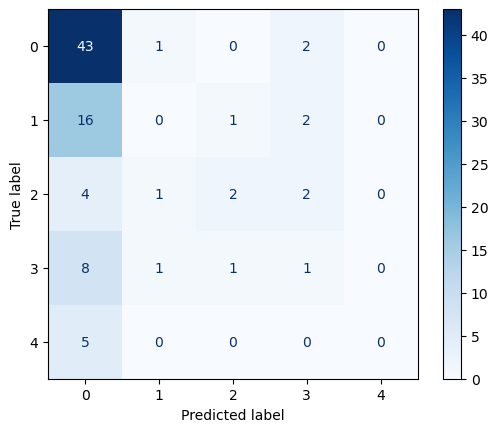

In [61]:
# Generate a multi-class confusion matrix
plot_confusion_matrix(mlp, X_test, Y_test, cmap=plt.cm.Blues)

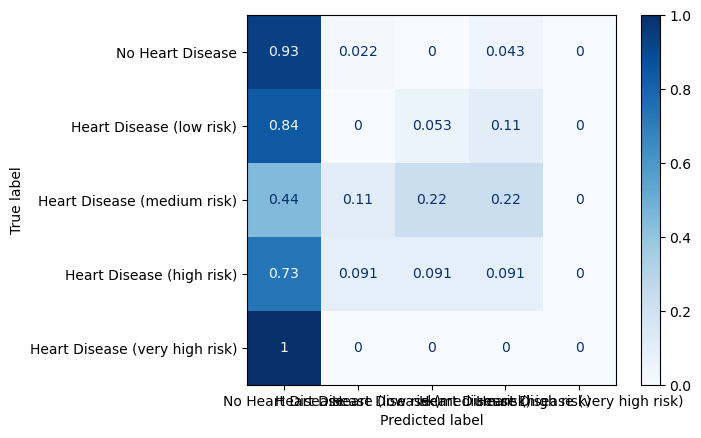

In [62]:
# Generate a 5x5 multi-class confusion matrix
classes = ['No Heart Disease', 'Heart Disease (low risk)', 'Heart Disease (medium risk)', 'Heart Disease (high risk)', 'Heart Disease (very high risk)']
plot_confusion_matrix(mlp, X_test, Y_test, cmap=plt.cm.Blues, normalize='true', display_labels=classes)